In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("training.csv")

In [3]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D;SEDAN;EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533;;;;;;;;;
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS;V6;2.7L;V6;M,SXT,4D;SEDAN;SXT;FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630;;;;;
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D;WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693;;;;;;;;;;;
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR;FWD;V6;3.9L,S,PASSENGER;3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633;;;;;;;;
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN;&;COUNTRY;FWD;V,Bas,MINIVAN;3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623;;;;;;;


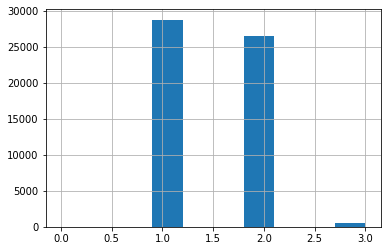

In [4]:
df['WheelTypeID'].hist(bins=10)
plt.show()

In [5]:
df['WheelTypeID'].isnull().sum()

2573

In [6]:
df['WheelTypeID'].value_counts()

1.0    28735
2.0    26485
3.0      589
0.0        4
Name: WheelTypeID, dtype: int64

In [7]:
df['WheelTypeID']=df['WheelTypeID'].fillna(-10)

In [8]:
df['WheelTypeID'].isnull().sum()

0

In [9]:
df['WheelTypeID'].value_counts()

 1.0     28735
 2.0     26485
-10.0     2573
 3.0       589
 0.0         4
Name: WheelTypeID, dtype: int64

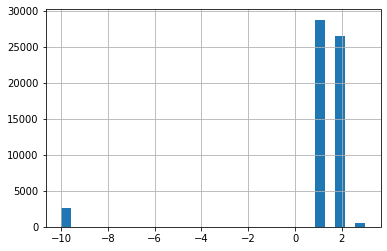

In [10]:
df['WheelTypeID'].hist(bins=30)
plt.show()

In [11]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                              0
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [12]:
df.drop(['WheelType'], axis=1, inplace =True)

In [13]:
df['Trim']=df['Trim'].fillna("XXXXX")

In [14]:
df = df.dropna(axis=0, subset=['Transmission'])

In [15]:
np.mean(df['MMRAcquisitionAuctionAveragePrice'])

6128.328141865844

In [16]:
df['MMRAcquisitionAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice'].fillna(np.mean(df['MMRAcquisitionAuctionAveragePrice']))

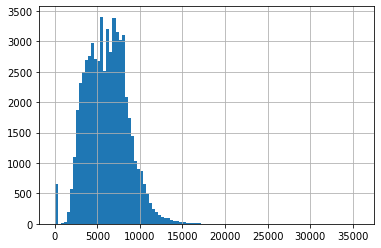

In [17]:
df['MMRAcquisitionAuctionAveragePrice'].hist(bins=100)

In [18]:
df[df['Nationality'].isnull()]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost;;;;;;;;;;;;
15769,10897,0,10/19/2009,MANHEIM,2002,7,GMC,SIERRA;1500,SL,BASE,...,NaN,NaN,NaN,NaN,16044,27542,NC,7500.0,0,1455;;;;;;;;;;;
18532,25187,0,12/10/2009,OTHER,2008,1,DODGE,NITRO;4WD;V6,SXT,4D;SUV;3.7L;SE,...,NaN,NaN,NaN,NaN,8655,38637,MS,9745.0,0,983;;;;;;;
20016,69980,0,2/17/2010,ADESA,2008,2,JEEP,PATRIOT;2WD;4C,Spo,4D;SUV;SPORT,...,NaN,NaN,NaN,NaN,21053,85226,AZ,9655.0,0,825;;;;;;;;
35157,69990,0,2/24/2010,ADESA,2008,2,JEEP,PATRIOT;2WD;4C,Spo,4D;SUV;SPORT,...,14026.0,15410.0,NaN,NaN,21053,85226,AZ,9955.0,0,825;;;;;;;;


In [19]:
df['Nationality']=df['Nationality'].fillna("AMERICAN")

In [20]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                              0
VehOdo                                   0
Nationality                              0
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentAuctionCleanPrice            245
MMRCurrentR

In [21]:
df['MMRAcquisitionAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice'].fillna(np.mean(df['MMRAcquisitionAuctionCleanPrice']))

In [22]:
df['MMRAcquisitionRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice'].fillna(np.mean(df['MMRAcquisitionRetailAveragePrice']))

In [23]:
df['MMRAcquisitonRetailCleanPrice']=df['MMRAcquisitonRetailCleanPrice'].fillna(np.mean(df['MMRAcquisitonRetailCleanPrice']))

In [24]:
df['MMRCurrentAuctionAveragePrice']=df['MMRCurrentAuctionAveragePrice'].fillna(np.mean(df['MMRCurrentAuctionAveragePrice']))

In [25]:
df['MMRCurrentAuctionCleanPrice']=df['MMRCurrentAuctionCleanPrice'].fillna(np.mean(df['MMRCurrentAuctionCleanPrice']))

In [26]:
df['MMRCurrentRetailAveragePrice']=df['MMRCurrentRetailAveragePrice'].fillna(np.mean(df['MMRCurrentRetailAveragePrice']))

In [27]:
df['MMRCurrentRetailCleanPrice']=df['MMRCurrentRetailCleanPrice'].fillna(np.mean(df['MMRCurrentRetailCleanPrice']))

In [28]:
df.drop(['PRIMEUNIT', 'AUCGUART', 'RefId', 'VehicleAge', 'Model', 'SubModel'], axis=1, inplace =True)

In [29]:
df.drop(['BYRNO'], axis=1, inplace =True)

In [30]:
df.drop(['VNZIP1'], axis=1, inplace =True)

In [31]:
df['WarrantyCost;;;;;;;;;;;;']=df['WarrantyCost;;;;;;;;;;;;'].replace(';','', regex=True)

In [32]:
df=df.rename(columns={'WarrantyCost;;;;;;;;;;;;':'WarrantyCost'})

In [33]:
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,10/25/2010,ADESA,2008,KIA,EX,BLUE,AUTO,2.0,61184,...,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533
1,0,5/27/2009,MANHEIM,2006,DODGE,SXT,SILVER,AUTO,2.0,92383,...,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630
2,0,3/18/2010,OTHER,2008,DODGE,SE,BLACK,AUTO,2.0,45965,...,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693
3,0,6/8/2009,OTHER,2005,FORD,S,BROWN,AUTO,2.0,80169,...,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633
4,0,3/4/2009,MANHEIM,2005,CHRYSLER,Bas,BLUE,AUTO,1.0,77372,...,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623


In [34]:
df['WarrantyCost'].head()

0     533
1    1630
2     693
3    1633
4    1623
Name: WarrantyCost, dtype: object

In [35]:
df['WarrantyCost']=df['WarrantyCost'].astype(str).astype(int)

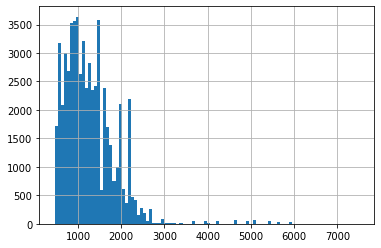

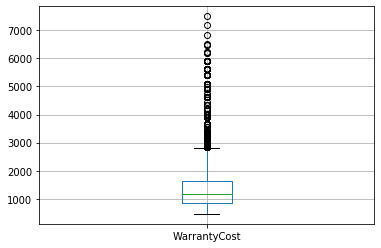

In [36]:
df['WarrantyCost'].hist(bins=100)
plt.show()

boxplot = df.boxplot(column=['WarrantyCost'])
plt.show()

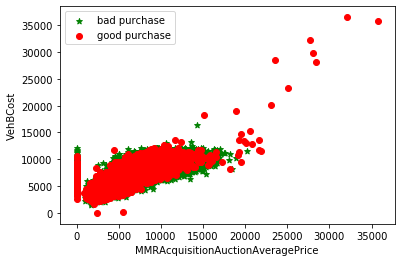

In [37]:
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['VehBCost'], color='g', marker='*', label='bad purchase')
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='r',label='good purchase')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.legend()
plt.show()

In [38]:
df['Size']=df['Size'].fillna("LARGE;SUV", limit=1)

In [39]:
df['Size']=df['Size'].fillna("MEDIUM;SUV", limit=1)

In [40]:
df['Size']=df['Size'].fillna("SMALL;SUV")

In [41]:
df[df['TopThreeAmericanName'].isnull()]

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
15769,0,10/19/2009,MANHEIM,2002,GMC,SL,WHITE,AUTO,2.0,78288,...,0.0,0.0,6131.849517,7390.162094,8776.442554,10145.632859,NC,7500.0,0,1455
18532,0,12/10/2009,OTHER,2008,DODGE,SXT,WHITE,AUTO,1.0,82466,...,15075.0,16710.0,6131.849517,7390.162094,8776.442554,10145.632859,MS,9745.0,0,983
20016,0,2/17/2010,ADESA,2008,JEEP,Spo,SILVER,AUTO,2.0,63822,...,13105.0,14129.0,6131.849517,7390.162094,8776.442554,10145.632859,AZ,9655.0,0,825
35157,0,2/24/2010,ADESA,2008,JEEP,Spo,BLACK,AUTO,2.0,61596,...,13397.0,14222.0,10159.000000,11695.000000,14026.000000,15410.000000,AZ,9955.0,0,825


In [42]:
df['TopThreeAmericanName']=df['TopThreeAmericanName'].fillna("GM", limit=1)

In [43]:
df['TopThreeAmericanName']=df['TopThreeAmericanName'].fillna("CHRYSLER")

In [44]:
df.isnull().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
Make                                 0
Trim                                 0
Color                                0
Transmission                         0
WheelTypeID                          0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [45]:
df['IsOnlineSale'].value_counts()

0    56879
1     1499
Name: IsOnlineSale, dtype: int64

In [46]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsBadBuy,VehYear,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1,-0.156884,-0.383809,0.0828306,-0.105785,-0.0993123,-0.0845083,-0.0807113,-0.105923,-0.100845,-0.10059,-0.0970114,-0.0981364,-0.00396958,0.0502329
VehYear,-0.156884,1,0.0915802,-0.283517,0.582324,0.533718,0.582318,0.540111,0.590246,0.547743,0.597673,0.557945,0.349628,0.0573076,-0.267622
WheelTypeID,-0.383809,0.0915802,1,-0.0611392,0.0121459,0.00399809,0.0148106,0.00784777,0.0150415,0.00844647,0.0205544,0.01438,0.00156046,-0.0163258,-0.0346189
VehOdo,0.0828306,-0.283517,-0.0611392,1,-0.0183283,0.023764,0.0291663,0.0614629,-0.0300122,0.0107656,0.0137339,0.0459927,-0.0643806,0.0310015,0.411218
MMRAcquisitionAuctionAveragePrice,-0.105785,0.582324,0.0121459,-0.0183283,1,0.990218,0.910182,0.909829,0.935774,0.930223,0.869625,0.868832,0.789061,0.0380179,-0.0495627
MMRAcquisitionAuctionCleanPrice,-0.0993123,0.533718,0.00399809,0.023764,0.990218,1,0.902335,0.917932,0.921715,0.930159,0.858718,0.869251,0.780833,0.0378849,-0.0194909
MMRAcquisitionRetailAveragePrice,-0.0845083,0.582318,0.0148106,0.0291663,0.910182,0.902335,1,0.990084,0.849612,0.847064,0.910899,0.903688,0.74543,0.0797522,-0.053357
MMRAcquisitonRetailCleanPrice,-0.0807113,0.540111,0.00784777,0.0614629,0.909829,0.917932,0.990084,1,0.844768,0.853347,0.900941,0.904485,0.744336,0.0767201,-0.0265594
MMRCurrentAuctionAveragePrice,-0.105923,0.590246,0.0150415,-0.0300122,0.935774,0.921715,0.849612,0.844768,1,0.990244,0.915148,0.912305,0.776666,0.0394876,-0.0567002
MMRCurrentAuctionCleanPrice,-0.100845,0.547743,0.00844647,0.0107656,0.930223,0.930159,0.847064,0.853347,0.990244,1,0.908624,0.92164,0.77306,0.0399765,-0.0280985


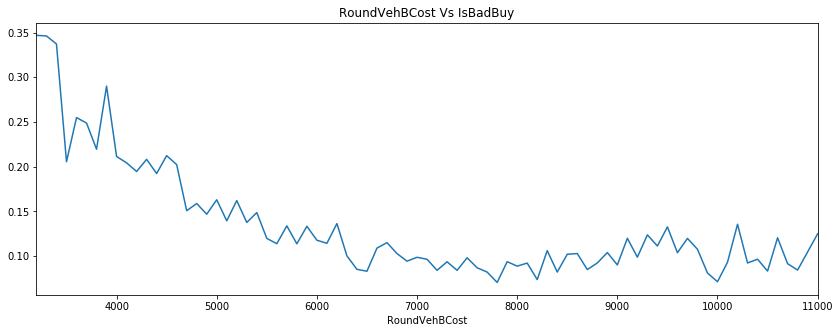

In [47]:
df['RoundVehBCost'] = round(df['VehBCost'],-2)
df.groupby('RoundVehBCost').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot(figsize=(14,5), title = "RoundVehBCost Vs IsBadBuy")
plt.show()

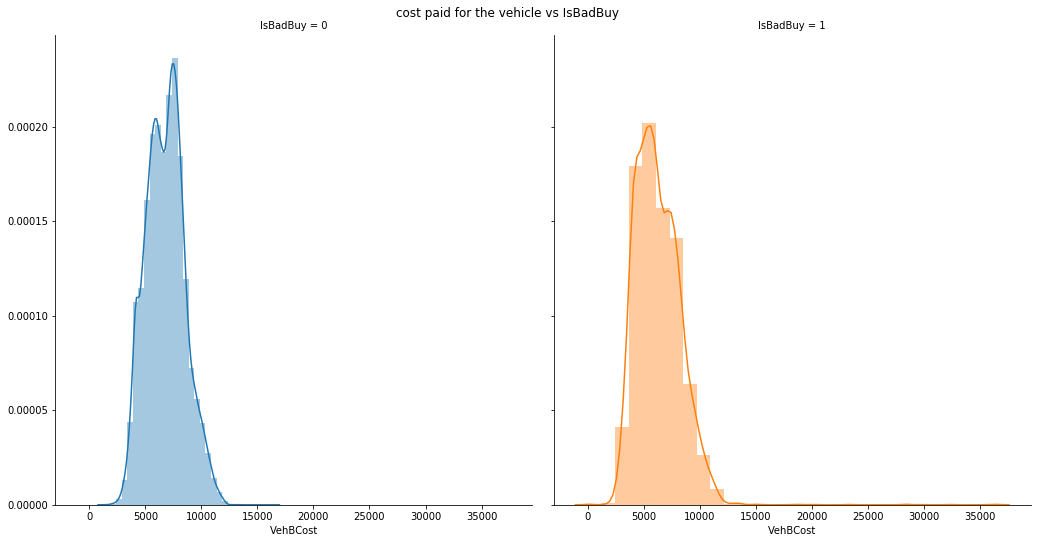

In [48]:
grid = sns.FacetGrid(df, col="IsBadBuy",hue = 'IsBadBuy' ,height=5)
grid.map(sns.distplot,'VehBCost',bins = 30);
grid.fig.suptitle('cost paid for the vehicle vs IsBadBuy')
grid.fig.set_size_inches(15,8)
plt.show()

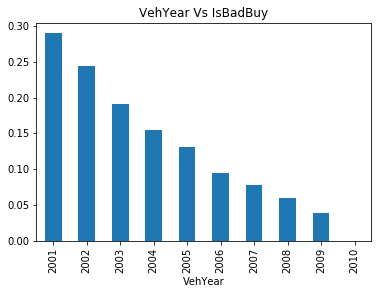

In [49]:
df.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

In [50]:
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,ADESA,2008,KIA,EX,BLUE,AUTO,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,MANHEIM,2006,DODGE,SXT,SILVER,AUTO,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,OTHER,2008,DODGE,SE,BLACK,AUTO,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,OTHER,2005,FORD,S,BROWN,AUTO,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,MANHEIM,2005,CHRYSLER,Bas,BLUE,AUTO,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [51]:
clean_auction = {"Auction":     {"ADESA": 1, "MANHEIM": 2, "OTHER": 3}}

In [52]:
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,ADESA,2008,KIA,EX,BLUE,AUTO,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,MANHEIM,2006,DODGE,SXT,SILVER,AUTO,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,OTHER,2008,DODGE,SE,BLACK,AUTO,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,OTHER,2005,FORD,S,BROWN,AUTO,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,MANHEIM,2005,CHRYSLER,Bas,BLUE,AUTO,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [53]:
df.replace(clean_auction, inplace=True)
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,AUTO,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,AUTO,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,AUTO,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,AUTO,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,AUTO,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [54]:
clean_trasmission = {"Transmission":     {"MANUAL": 1, "AUTO": 2}}

In [55]:
df.replace(clean_trasmission, inplace=True)
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [56]:
df = df.drop(df[df['Nationality'] == 'OTHER'].sample(frac=1).index)

In [57]:
df["Nationality"].value_counts()

AMERICAN          48796
OTHER;ASIAN        6435
TOP;LINE;ASIAN     2995
Name: Nationality, dtype: int64

In [58]:
clean_trasmission = {"Nationality":     {"AMERICAN": 1, "OTHER;ASIAN": 2, "TOP;LINE;ASIAN": 3}}

In [59]:
df.replace(clean_trasmission, inplace=True)
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [60]:
df["Size"].value_counts()

MEDIUM         24639
LARGE           7118
MEDIUM;SUV      6397
COMPACT         5702
VAN             4676
LARGE;TRUCK     2554
SMALL;SUV       1807
SPECIALTY       1440
CROSSOVER       1419
LARGE;SUV       1158
SMALL;TRUCK      695
SPORTS           621
Name: Size, dtype: int64

In [61]:
df['Size']=df['Size'].replace('MEDIUM;SUV','MEDIUM', regex=True)

In [62]:
df['Size']=df['Size'].replace('VAN','MEDIUM', regex=True)

In [63]:
df['Size']=df['Size'].replace('CROSSOVER','MEDIUM', regex=True)

In [64]:
df['Size']=df['Size'].replace('LARGE;SUV','LARGE', regex=True)

In [65]:
df['Size']=df['Size'].replace('LARGE;TRUCK','LARGE', regex=True)

In [66]:
df['Size']=df['Size'].replace('COMPACT','SMALL', regex=True)

In [67]:
df['Size']=df['Size'].replace('SMALL;SUV','SMALL', regex=True)

In [68]:
df['Size']=df['Size'].replace('SMALL;TRUCK','SMALL', regex=True)

In [69]:
df['Size']=df['Size'].replace('SPECIALTY','SPORTS', regex=True)

In [70]:
df["Size"].value_counts()

MEDIUM    37131
LARGE     10830
SMALL      8204
SPORTS     2061
Name: Size, dtype: int64

In [71]:
df['Size']=df['Size'].replace('SPORTS','SPORT', regex=True)

In [72]:
df["Size"].value_counts()

MEDIUM    37131
LARGE     10830
SMALL      8204
SPORT      2061
Name: Size, dtype: int64

In [73]:
clean_trasmission = {"Size":     {"MEDIUM": 1, "LARGE": 2, "SMALL": 3, "SPORT": 4}}

In [74]:
df.replace(clean_trasmission, inplace=True)
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0


In [75]:
df

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0
5,0,4/22/2009,1,2007,KIA,EX,WHITE,2,2.0,24541,...,6143.0,4247.0,5225.0,5087.0,6143.0,AZ,5430.0,0,462,5400.0
6,0,5/21/2010,1,2005,NISSAN,Bas,WHITE,2,2.0,81478,...,11769.0,6060.0,7586.0,9518.0,11377.0,FL,7675.0,0,723,7700.0
7,0,9/24/2009,2,2008,DODGE,SE,BLUE,2,2.0,56717,...,10466.0,7965.0,8884.0,11871.0,12554.0,SC,7810.0,0,920,7800.0
8,0,7/6/2010,2,2006,SUZUKI,XXXXX,BLACK,2,2.0,34616,...,12109.0,3760.0,4667.0,6935.0,8216.0,OR,5870.0,0,462,5900.0
9,0,6/4/2009,2,2006,SUZUKI,XXXXX,MAROON,1,2.0,57337,...,5756.0,3913.0,4867.0,4726.0,5756.0,GA,4825.0,0,505,4800.0


In [76]:
df.to_csv(r'DataCleaned.csv')

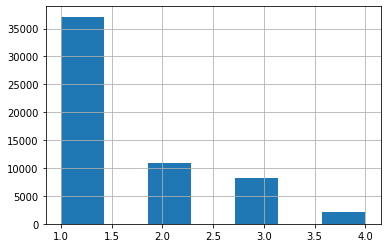

In [77]:
df["Size"].hist(bins=7)

In [79]:
df["TopThreeAmericanName"].value_counts()

GM          20246
CHRYSLER    18734
FORD         9816
OTHER        9430
Name: TopThreeAmericanName, dtype: int64

In [80]:
clean_american = {"TopThreeAmericanName":     {"GM": 1, "CHRYSLER": 2, "FORD": 3, "OTHER": 4}}

In [81]:
df.replace(clean_american, inplace=True)
df.head()

,IsBadBuy,PurchDate,Auction,VehYear,Make,Trim,Color,Transmission,WheelTypeID,VehOdo,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,RoundVehBCost
0,1,10/25/2010,1,2008,KIA,EX,BLUE,2,2.0,61184,...,10805.0,6628.0,7535.0,9605.0,10650.0,FL,6100.0,0,533,6100.0
1,0,5/27/2009,2,2006,DODGE,SXT,SILVER,2,2.0,92383,...,7478.0,5480.0,6461.0,6418.0,7478.0,FL,4000.0,0,1630,4000.0
2,0,3/18/2010,3,2008,DODGE,SE,BLACK,2,2.0,45965,...,11652.0,7497.0,8102.0,10721.0,11350.0,OK,7500.0,0,693,7500.0
3,0,6/8/2009,3,2005,FORD,S,BROWN,2,2.0,80169,...,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,4725.0,0,1633,4700.0
4,0,3/4/2009,2,2005,CHRYSLER,Bas,BLUE,2,1.0,77372,...,7664.0,5370.0,6811.0,6300.0,7856.0,TX,5670.0,0,1623,5700.0
